# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [2]:
# Import pandas & numpy
import pandas as pd
import numpy as np
import pingouin
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from statsmodels.stats.proportion import proportions_ztest


# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

## Case Study 1 : EA Sports - A/B Testing

- In 2013, Electronic Arts, or EA, launched a video game called SimCity 5. 
- They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most. 
- Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.
- Here's each version of the SimCity 5 pre-order page. The control group saw the version with a banner advertising money off their next purchase with each pre-order. 
- The treatment group saw the version without the banner.
- EA compared the percentage of checkouts for the two groups to see which performed best. 
- Our naive guess would be that the advertisement increased pre-order sales.
- Results of the A/B test were surprising. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert. 
- Experiment proved that our intuition that more discount adverts would result in more sales was false.
- Was the 43 percent difference a meaningful difference between the control and treatment groups, or was it just random chance?
![image](image.png)


# Hypothesis


## Null Hypothesis ($H_{0}$) : 

## Alternate Hypothesis ($H_{A}$) : 


## Hypothesis Testing Workflow

- Identify Population parameter that is hypothesized about
- Specify null and alternate hypothesis
- Determine standardized test statistic and corresponding null distribution
- Conduct hypothesis test in Python
- Measure evidence against null hypothesis
- Make a decision comparing evidence to significance level
- Interpret results in context of original problem

# z-scores

- Since variables have arbitrary units and ranges, before we test our hypothesis, we need to standardize the values. 
- A common way of standardizing values is to subtract the mean, and divide by the standard deviation. 
    - $z = \frac{{value} - {mean}}{{std. dev.}}$

- For hypothesis testing, we use a variation where we take the sample statistic, subtract the hypothesized parameter value, and divide by the standard error.
    - $z = \frac{{sample. stat} - {hypoth. param. value}}{{std. error.}}$


## Case Study 2 : StackOverflow DataScientist Mean Salary

- Each year, Stack Overflow surveys its users, who are primarily software developers, about themselves, how they use Stack Overflow, their work, and the development tools they use. In this course, we'll look at a subset of the survey responses from users who identified as Data Scientists.
- Hypothesis
    - Let's hypothesize that the mean annual compensation of the population of data scientists is <b>110,000 dollars</b>. 

- The point estimate (sample statistic):
    - `mean_comp_samp = stack_overflow['converted_comp'].mean() ## 119,574`
- The sample mean is a type of point estimate, which is another name for a summary statistic. 
- The result is different from our hypothesis, but is it meaningfully different?
- Generate Bootstrap Distribution

    ```
    import numpy as np
    # Step 3. Repeat steps 1 & 2 many times, appending to a list
    so_boot_distn = []
    for i inrange(5000):
        so_boot_distn.append(
            # Step 2. Calculate point estimate    
            np.mean(
            # Step 1. Resample        
            stack_overflow.sample(frac=1, replace=True)['converted_comp'])
                   )
    ```
- Visualizing Sampling Distribution
    ```
    import matplotlib.pyplot as plt
    plt.hist(so_boot_distn, bins=50)
    plt.show()
    ```

- Calculate Stadard Error
    ```
    std_error = np.std(so_boot_distn, ddof = 1)
    ```
    
- Calculating z-scores

    ```
    # Find z-score of late_prop_samp
    z_score = (late_prop_samp - late_prop_hyp)/std_error
    ```


    ##### The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.
    
- **Objective** : Determine whether sample statistics are close to or far away from expected (hypothesiszed value)

**Step 01 - Preparing Data**

In [3]:
# Filtering dataset for Respondents that might be Data Scientists
stack_overflow = stackoverflow[stackoverflow['main_branch'].isin(['I am not primarily a developer, but I write code sometimes as part of my work'])]

# Looking at the dataset
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,currency_desc,currency_symbol,database_desire_next_year,database_worked_with,dev_type,ed_level,employment,ethnicity,gender,job_factors,job_sat,job_seek,language_desire_next_year,language_worked_with,misc_tech_desire_next_year,misc_tech_worked_with,new_collab_tools_desire_next_year,new_collab_tools_worked_with,new_dev_ops,new_dev_ops_impt,new_ed_impt,new_job_hunt,new_job_hunt_research,new_learn,new_off_topic,new_onboard_good,new_other_comms,new_overtime,new_purchase_research,purple_link,newso_sites,new_stuck,op_sys,org_size,platform_desire_next_year,platform_worked_with,purchase_what,sexuality,so_account,so_comm,so_part_freq,so_visit_freq,survey_ease,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server;MongoDB;SQLite,IBM DB2;Microsoft SQL Server;MongoDB;SQLite,Data or business analyst;Data scientist or mac...,Some college/university study without earning ...,Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly satisfied,"I’m not actively looking, but I am open to new...",C#;Go;HTML/CSS;JavaScript;Python;SQL,C#;Go;HTML/CSS;Java;JavaScript;Python;R;SQL,Keras;Node.js;Pandas;TensorFlow,Node.js;Pandas,Confluence;Jira;Github;Slack;Trello,Confluence;Jira;Github;Slack;Trello,Not sure,Neutral,Somewhat important,Having a bad day (or week or month) at work;Cu...,None,Every few months,No,Yes,No,Sometimes: 1-2 days per month but less than we...,None,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,Windows,"1,000 to 4,999 employees",Linux;MacOS;Windows,MacOS;Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,United States dollar,USD,PostgreSQL,PostgreSQL,Data scientist or machine learning specialist;...,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Family friend...,Very satisfied,I am not interested in new job opportunities,Python,Python;SQL,Keras;Pandas;TensorFlow;Torch/PyTorch,Keras;Pandas;TensorFlow,Jira,Jira,Not sure,Neutral,Critically important,Better work/life balance,Personal network - friends or family;Directly ...,Once every few years,No,Yes,No,Occasionally: 1-2 days per quarter but less th...,None,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,Windows,"5,000 to 9,999 employees",Docker;Kubernetes,Docker,I have little or no influence,Straight / Heterosexual,Not sure/can't remember,"No, not really",None,Multiple times per day,Easy,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,Canadian dollar,CAD,None,MariaDB,Data scientist or machine learning specialist;...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Diversity of the company or organization;Flex ...,Very satisfied,I am not interested in new job opportunities,Rust,HTML/CSS;JavaScript;Python;TypeScript,None,Node.js;Pandas,None,Github;Slack,No,Somewhat important,Very important,Curious about other opportunities;Wanting to w...,"Read company media, such as empl

**Step 02 - Calculating Sample Mean**

In [4]:
# Calculating the Sample Mean - Point Estimate
print("Point Estimate (Sample Statistic) : ",stack_overflow['converted_comp'].mean())

Point Estimate (Sample Statistic) :  126924.55532786885


**Step 03 - Generating a Boostrap Distribution**

In [5]:
# Generating a Boostrap Distribution (Sampling with Replacement)

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(
        # Step 2. Calculate point estimate    
        np.mean(
        # Step 1. Resample        
        stack_overflow.sample(frac=1, replace=True)['converted_comp'])
               )

**Step 04 - Visualizing Sample Mean**

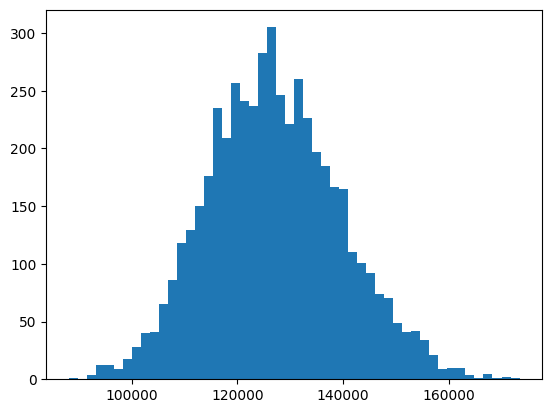

In [6]:
# Visualizing Sample Mean
plt.hist(so_boot_distn, bins=50)
plt.show()

## Appears to be centered around 130k, which is different from 126,924 but how different?

## Exercise 1 : Calculating the sample mean

The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

```
prop = (df['col'] == val).mean()
```
late_shipments is available, and pandas is loaded as pd

- Print the late_shipments dataset.
- Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is "Yes".

In [7]:
# Print the late_shipments dataset
print(shipments.head())

# Calculate the proportion of late shipments
late_prop_samp = (shipments[shipments['late']=='Yes'].shape[0])/(shipments.shape[0])

# Print the results
print("Proportion of Late Shipments : ",late_prop_samp)

        id       country  ... freight_cost_groups line_item_insurance_usd
0  36203.0       Nigeria  ...           expensive                  373.83
1  30998.0      Botswana  ...          reasonable                    1.72
2  69871.0       Vietnam  ...           expensive                  181.57
3  17648.0  South Africa  ...           expensive                  779.41
4   5647.0        Uganda  ...          reasonable                    0.01

[5 rows x 27 columns]
Proportion of Late Shipments :  0.061


## Exercise 2 : Calculating a z-score
Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

The sample statistic is available as late_prop_samp.

late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

pandas and numpy are loaded with their usual aliases.

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the standard error from the standard deviation of the bootstrap distribution.
- Calculate the z-score.

In [8]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Step 3. Repeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []

for i in range(5000):
    
    shimpments_sample = shipments.sample(frac=1, replace=True)
    shimpments_sample_size = shimpments_sample.shape[0]
    late_shipments_size = shimpments_sample[shimpments_sample['late']=='Yes'].shape[0]
    
    late_shipments_boot_distn.append((float(late_shipments_size/shimpments_sample_size)))

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

# The z-score is a standardized measure of the difference between the sample statistic and the hypothesized statistic.

0.13367632924408301


# p-value

- Hypothesis Tests are like Criminal Trials

- There are two possible true states: 
    - Defendant committed the crime
    - Defendant did not commit the crime

- Two Possible Verdits
    - Guilty
    - Not guilty

- Initial Assumption
    - Defendant is not guilty

- Prosecution team must present evidence beyond a reasonable doubt that the defendant committed the crime for a guilty verdict to be given.

## Criminal Trial v/s Hypothesis Testing

| Crimincal Trial | Hypothesis Testing |
|-----------------|--------------------|
| Either defendant guilty or not guilty | Either H~0~ or H~A~ is true |
| Innocent until proven guilty, assumed to be not guilty initially | H~0~ is assumed to be true initially |
| Trial outcome - guilty or not guilty | Hypothesis Test outcome - **reject H~0~** or **fail to reject H~0~** |
| Evidence beyond a reasonable doubt that the defendant committed the crime -> He is guilty | Eveidence from sample significant that H~A~ is true, reject H~0~ |

## one-Tailed v/s two-Tailed Tests

- Hypothesis tests check if the sample statistic lie in the tails of null distribution

![tails](tails.png)



| Test | Tails |
|------|-------|
|alternative different from null | two-tailed |
|alternative greater than null | right-tailed |
|alternative fewer than null | left-tailed |


| Type of Test | Examples |
|--------------|----------|
| Two Tails | Is there diff b/w voting pref of 40 v/s 80 year old? |
| Two Tails | Should we expect Slack and Zoom to have dissimilar mean #employees over last 3 years? |
| Left Tail | Are grapes lower in popularity than raisins, on average? |
| Left Tail | Is there evidence to conclude Belgian workers have lower salaries than Italian workers? |
| Right Tail | Do hamburgers have more calories than hot dogs, on average? |
| Right Tail | Do cats tend to live longer than dogs? |


- **p-values**
    - Probability of obtaining a result, assuming null hypothesis is true
    - p-values measure the strength of support for the null hypothesis
    - they measure the probability of obtaining a result, assuming the null hypothesis is true.
    - **Large p-values** mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result.
    - **Small p-values** mean our statistic is producing a result likely in the tail of our null distribution. 
    - Because p-values are probabilities, they are always between zero and one.

![p_values](p_values.png)


## Calculating p-value

![cdf](cdf.png)

**Left tailed test (less than)**

`p_value = norm.cdf(z_score)`

**Right tailed test (greater than)**

`p_value = 1 - norm.cdf(z_score)`

**Two tailed test (not equal)**

`p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)`

## Case Study 3 : Age of first programming exercise

- age_first_code_cut classifies when Stack Overflow user first started programming
    - "adult" means they started at 14 or older
    - "child" means they started before 14
- Previous research: 35% of software developers started programming as children
- Evidence that a greater proportion of data scientists starting programming as children?
- **Hypothesis**
    - Statement about an unknow population parameter

- Hypothesis Test is a test of two competing hypothesis
    - **Null Hypothesis** ($H_{O}$) : Existing Idea available
    - **Alternate Hypothesis** ($H_{A}$) : New "Challenger" idea of researcher


- Our Problem Statement : 
    - **Null Hypothesis** ($H_{O}$) : Proportion of data scientists starting programming as children is 35%
    - **Alternate Hypothesis** ($H_{A}$) : Proportion of data scientists starting programming as children is greater than 35%

- Solution
    - Calculate Sample Statistic
    - Generate bootstrap distribution of sample data and calculate standard error
    - Calcaulte z-score
    - Calculate p-value

In [9]:
# Sample Statistic - Proportion of Data Scientists who started coding as 'Child'

prop_child_samp = (stack_overflow[stack_overflow['age_first_code_cut'].isin(['child'])].shape[0])/stack_overflow.shape[0]

print("Sample Statistic Proportion",prop_child_samp)

# Null Hypothesis -- Proportion of data scientists starting programming as children is greater than 35%

prop_child_hyp = 0.35

print("Hypothesis Statistic Proportion",prop_child_hyp)

# Generating Bootstrapped Samples
first_code_boot_distn = []

for i in range(5000):
    # Sample with Replacement
    stack_overflow_sample = stack_overflow.sample(frac=1, replace=True)
    # Denominator
    stack_overflow_sample_size = stack_overflow_sample.shape[0]
    # Numerator
    child_stack_overflow_sample_size = stack_overflow_sample[stack_overflow_sample['age_first_code_cut']=='child'].shape[0]
    # Child Proportion
    first_code_boot_distn.append((float(child_stack_overflow_sample_size/stack_overflow_sample_size)))
    
# Calculating Standard Error
std_error = np.std(first_code_boot_distn, ddof = 1)

print("Standard Error of Sampling Distribution :",std_error)

# Calculating z-score
z_score = (prop_child_samp - prop_child_hyp)/std_error

print("z-Score :",z_score)

# Calculating p-Value
# loc = 0, Mean of normal distribution centered around 0
# scale = 1, Standard Deviation of normal distribution is 1
print("p-Value : ",1-norm.cdf(z_score, loc = 0, scale = 1))

Sample Statistic Proportion 0.3790983606557377
Hypothesis Statistic Proportion 0.35
Standard Error of Sampling Distribution : 0.02197194377855095
z-Score : 1.3243416672194293
p-Value :  0.09269479908898037


## Exercise 3 : Calculating p-values
In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a p-value from the z-score.

You'll now return to the late shipments dataset and the proportion of late shipments.

The null hypothesis, $H_{O}$, is that the proportion of late shipments is six percent.

The alternative hypothesis, $H_{A}$, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, late_prop_samp, the hypothesized value, late_prop_hyp (6%), and the bootstrap standard error, std_error are available. norm from scipy.stats has also been loaded without an alias.

- What type of test should be used for this alternative hypothesis?
- Calculate the z-score of late_prop_samp.
- Calculate the p-value for the z-score, using a right-tailed test.

In [10]:
# Calculate the proportion of late shipments
late_prop_samp = (shipments[shipments['late']=='Yes'].shape[0])/(shipments.shape[0])

# Print the results
print("Proportion of Late Shipments : ",late_prop_samp)

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06
print("Hypothesis Statistic Proportion",late_prop_hyp)

# Step 3. Repeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []

for i in range(5000):
    
    shimpments_sample = shipments.sample(frac=1, replace=True)
    shimpments_sample_size = shimpments_sample.shape[0]
    late_shipments_size = shimpments_sample[shimpments_sample['late']=='Yes'].shape[0]
    
    late_shipments_boot_distn.append((float(late_shipments_size/shimpments_sample_size)))

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error
print("Standard Error of Sampling Distribution :",std_error)

# Print z_score
print("z-Score :",z_score)

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = (1 - norm.cdf(z_score, loc = 0, scale = 1))
                 
# Print the p-value
print("p-Value : ",1-norm.cdf(z_score, loc = 0, scale = 1))

Proportion of Late Shipments :  0.061
Hypothesis Statistic Proportion 0.06
Standard Error of Sampling Distribution : 0.007585896559097091
z-Score : 0.13182357447265608
p-Value :  0.4475619197700298


# Statistical Significance

- **p-values** quantify how much evidence there is for the null hypothesis. 
- Large p-values indicate a lack of evidence for the alternative hypothesis,sticking with the assumed null hypothesis instead. 
- Small p-values make us doubt this original assumption in favor of the alternative hypothesis. 
- Significance Level:
    - Significance Level of a hypothesis test ($\alpha$), threshold point for "beyond a reasonable doubt"
    - if p <= $\alpha$ --> reject $H_{O}$ **else** fail to reject $H_{O}$
- $\alpha$ should be set prior to conducting hypothesis test


# Confidence Interval

- For a significance level of $\alpha$ it is common to choose a confidence interval of (1-$\alpha$)


# Types of Error

**Criminal Trial**

|   |Actual - Didn't commit crime |Actual - Committed crime|
|---|-------------------------|----------------------------|
|**Verdict-Not Guilty**|**Correct**|Got Away with crime|
|**Verdict-Guilty**|Wrong Conviction |**Correct**|

**Hypothesis Test**

|   |Actual - $H_{O}$ |Actual - $H_{A}$|
|---|-------------------------|----------------------------|
|Chosen- $H_{O}$|**Correct**|False Negative|
|Chosen- $H_{A}$|False Positive|**Correct**|

- **False Positive** (Type - I Error)
    - Incorrectly rejected $H_{O}$
- **False Negative** (Type - II Error)
    - Incorrectly didn't reject $H_{O}$

## Exercise 4 : Calculating a confidence interval

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

late_prop_samp and late_shipments_boot_distn are available; pandas and numpy are loaded with their usual aliases.

- Calculate a 95% confidence interval from late_shipments_boot_distn using the quantile method, labeling the lower and upper intervals lower and upper.

In [11]:

# Calculate the proportion of late shipments
late_prop_samp = (shipments[shipments['late']=='Yes'].shape[0])/(shipments.shape[0])

# Print the results
print("Proportion of Late Shipments : ",late_prop_samp)

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06
print("Hypothesis Statistic Proportion",late_prop_hyp)

# Step 3. Repeat steps 1 & 2 many times, appending to a list
late_shipments_boot_distn = []

for i in range(5000):
    
    shimpments_sample = shipments.sample(frac=1, replace=True)
    shimpments_sample_size = shimpments_sample.shape[0]
    late_shipments_size = shimpments_sample[shimpments_sample['late']=='Yes'].shape[0]
    
    late_shipments_boot_distn.append((float(late_shipments_size/shimpments_sample_size)))

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof = 1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error
print("Standard Error of Sampling Distribution :",std_error)

# Print z_score
print("z-Score :",z_score)

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = (1 - norm.cdf(z_score, loc = 0, scale = 1))
                 
# Print the p-value
print("p-Value : ",1-norm.cdf(z_score, loc = 0, scale = 1))

# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn,0.025)
upper = np.quantile(late_shipments_boot_distn,0.975)

# Print the confidence interval
print("Upper and Lower Confidence Interval : ",lower, upper)



Proportion of Late Shipments :  0.061
Hypothesis Statistic Proportion 0.06
Standard Error of Sampling Distribution : 0.00757351762352467
z-Score : 0.13203904047094656
p-Value :  0.44747670611881807
Upper and Lower Confidence Interval :  0.047 0.076


# t-Tests

- The **Student's t-test** aka **t-test** for quantifying the dierence between the mean of two independent data samples.

## t-Distribution

![t_distribution](t_distribution.png)

- The test statistic, t, follows a t-distribution. t-distributions have a parameter called the degrees of freedom, or df for short. 
- t-distribution for small degrees of freedom has fatter tails than the normal distribution, but otherwise they look similar.
- As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution. In fact, a normal distribution is a t-distribution with infinite degrees of freedom. 
- Degrees of freedom are defined as the maximum number of logically independent values in the data sample. 


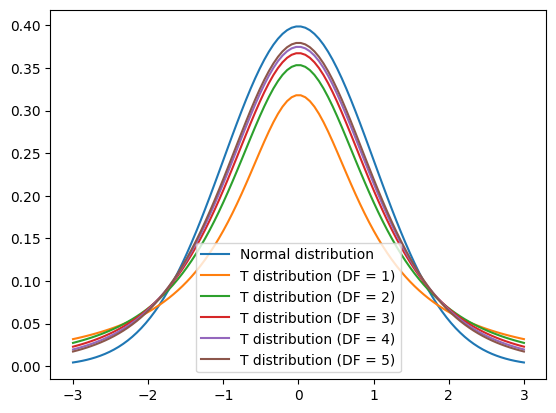

In [12]:
# define the parameters of the normal distribution
mu = 0
sigma = 1

# define the parameters of the t distribution
df = 5

# generate data from the normal distribution
x_norm = np.linspace(-3, 3, 100)
y_norm = norm.pdf(x_norm, mu, sigma)

# generate data from the t distribution
x_t = np.linspace(-3, 3, 100)
y_t_1 = t.pdf(x_t, 1, mu, sigma)
y_t_2 = t.pdf(x_t, 2, mu, sigma)
y_t_3 = t.pdf(x_t, 3, mu, sigma)
y_t_4 = t.pdf(x_t, 4, mu, sigma)
y_t_5 = t.pdf(x_t, 5, mu, sigma)

# plot the data
plt.plot(x_norm, y_norm, label='Normal distribution')
plt.plot(x_t, y_t_1, label='T distribution (DF = 1)')
plt.plot(x_t, y_t_2, label='T distribution (DF = 2)')
plt.plot(x_t, y_t_3, label='T distribution (DF = 3)')
plt.plot(x_t, y_t_4, label='T distribution (DF = 4)')
plt.plot(x_t, y_t_5, label='T distribution (DF = 5)')
plt.legend()
plt.show()

## t-Distribution : Calculating Degrees of Freedom

**Example**
- Dataset has 5 independent observations
- Four of the values are 2,6,8 and 5
- Sample mean is 5
- Then, last value must be 4
- Even though all five observations in the sample were independent, because we know an additional fact about the sample - that is has a mean of 5 - we only have 4 degrees of freedom. 

## t-Distribution v/s  z-distribution

- When a sample standard deviation is used in estimating a standard error,  t-distribution needed instead of the z-distribution

## Case Study : Comparing Compensation of two groups

- Comparing sample statistics across groups in a variable. 
- **converted_comp** is a numerical variable of annual compensation. 
- **age_first_code_cut** is a categorical variable with two levels: **child** and **adult**, which describe when the user started programming. 
- **Question** : questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?


- **Null Hypothesis ($H_{O}$)** : Mean compensation for the two groups is same
    - $H_{O}$ --> $\mu_{child} = \mu_{adult}$
    - $H_{O}$ --> $\mu_{child} - \mu_{adult}$ = 0
- **Alternate Hypothesis ($H_{A}$)** : Mean compensation for users who started coding as children is greater than for users who started coding as adults.
    - $H_{A}$ --> $\mu_{child} > \mu_{adult}$
    - $H_{A}$ --> $\mu_{child} - \mu_{adult}$ > 0

**Methodology**
- Calculating group-wise summary statistics
```
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
```
- Getting Test Statistics
    - Sample Mean - $\bar{x}$
    - Sample mean for respondents that started coding as child - $\bar{x}_{child}$
    - Sample mean for respondents that started coding as adult - $\bar{x}_{adult}$

- Standardizing Test Statistic
    - z = (Sample Stat. - Population Param.)/(Std. Error)
    - t = (diff in sample stat. - diff in population param.)/(standard error)
    - $t = \frac{(\bar{x}_{child} - \bar{x}_{adult}) - (\mu_{child} - \mu_{adult})}{SE(\bar{x}_{child} - \bar{x}_{adult})}$
        - $SE(\bar{x}_{child} - \bar{x}_{adult}) = \sqrt{\frac{(s_{child})^2}{n_{child}}+\frac{(s_{adult})^2}{n_{adult}}}$
        - where s is the standard deviation of the variable
        - n is the number of observations

Assuming ($\mu_{child} - \mu_{adult}$) = 0, then

- $t = \frac{(\bar{x}_{child} - \bar{x}_{adult})}{SE(\bar{x}_{child} - \bar{x}_{adult})}$

**Degree of Freedom**

In our two sample case, there are as many degrees of freedom as observations, minus two because we know two sample statistics, the means for each group.

In [13]:
# Choose Significance Level
alpha = 0.1
print("Significance Level : ",alpha)

# Getting mean of sub-groups
xbar_child = stack_overflow[stack_overflow['age_first_code_cut']=='child']['converted_comp'].mean()
xbar_adult = stack_overflow[stack_overflow['age_first_code_cut']=='adult']['converted_comp'].mean()

# Getting standard deviation of sub-groups
s_child = stack_overflow[stack_overflow['age_first_code_cut']=='child']['converted_comp'].std()
s_adult = stack_overflow[stack_overflow['age_first_code_cut']=='adult']['converted_comp'].std()

# Getting size of sub-groups
n_child = stack_overflow[stack_overflow['age_first_code_cut']=='child']['converted_comp'].count()
n_adult = stack_overflow[stack_overflow['age_first_code_cut']=='adult']['converted_comp'].count()

# Getting sample statistic
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

# Getting sample standard deviation
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()

# Getting sample size
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

numerator = xbar_child - xbar_adult

denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)

t_stat = numerator / denominator

print("t-Statistic Value : ",t_stat)

# Degree of Freedom Calculation
degrees_of_freedom = n_child + n_adult - 2

print("Degrees of Freedom : ",degrees_of_freedom)

# Calculating p-values
p_value = 1 - t.cdf(t_stat, df = degrees_of_freedom)

print("p-Value : ",p_value)

print("\n** Hypothesis Test Results **")

if (p_value<=alpha):
    print("Rejecting H~O~")
    print("\nMean compensation for users who started coding as children is greater than for users who started coding as adults.")
else:
    print("\nNot Rejecting H~O~")
    print("\nMean compensation for the two groups is same")

Significance Level :  0.1
t-Statistic Value :  -0.048731897781426524
Degrees of Freedom :  486
p-Value :  0.519423512451377

** Hypothesis Test Results **

Not Rejecting H~O~

Mean compensation for the two groups is same


### Exercise 5 : Two sample mean test statistic

The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

![t_stat](t_stat.png)

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

- What type of test does the alternative hypothesis indicate that we need? - **Left tailed**
- Calculate the numerator of the test statistic.
- Calculate the denominator of the test statistic.
- Use those two numbers to calculate the test statistic.

**$H_{O}$** : The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

**$H_{A}$**: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

In [14]:
# Choose Significance Level
alpha = 0.05
print("Significance Level : ",alpha)

# Getting mean of sub-groups
xbar_no = shipments[shipments['late']=='No']['weight_kilograms'].mean()
xbar_yes = shipments[shipments['late']=='Yes']['weight_kilograms'].mean()

# Getting standard deviation of sub-groups
s_no = shipments[shipments['late']=='No']['weight_kilograms'].std()
s_yes = shipments[shipments['late']=='Yes']['weight_kilograms'].std()

# Getting size of sub-groups
n_no = shipments[shipments['late']=='No']['weight_kilograms'].count()
n_yes = shipments[shipments['late']=='Yes']['weight_kilograms'].count()

# Calculate the numerator of the test statistic
numerator = (xbar_no - xbar_yes)

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no**2)/n_no + (s_yes**2)/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print("t-Statistic Value : ",t_stat)

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

print("Degrees of Freedom : ",degrees_of_freedom)

# Calculating p-values
p_value = t.cdf(t_stat, df = degrees_of_freedom)

print("p-Value : ",p_value)

print("\n** Hypothesis Test Results **")

if (p_value<=alpha):
    print("Rejecting H~O~")
    print("\nThe mean weight of shipments that weren't late is less than the mean weight of shipments that were late..")
else:
    print("\nNot Rejecting H~O~")
    print("\nThe mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.")

Significance Level :  0.05
t-Statistic Value :  -2.3936661778766433
Degrees of Freedom :  998
p-Value :  0.008432382146249523

** Hypothesis Test Results **
Rejecting H~O~

The mean weight of shipments that weren't late is less than the mean weight of shipments that were late..


# Paired t-Tests

- The paired Student's t-test for quantifying the dierence between the mean of two dependent data samples

**Examples**

|Paired|Not Paired|
|------|----------|
|Test effectivenes of new teaching technique, pre and post intervention on **same random sample** of students|Test effectivenes of new teaching technique, pre and post intervention on **two different random sample** of students|

## Case Study : US Republican Presidents Dataset

Here's a dataset of US presidential elections. Each row represents a presidential election at the county level. The variables in the dataset are the US state, the county within that state, and the percentage of votes for the Republican candidate in 2008, and in 2012.

**Question**
- Whether the percentage of votes for the Republican candidate was lower in 2008 compared to 2012. 

**Hypothesis**

- **Null hypothesis $H_{O}$** 
    - Null hypothesis is that our hunch is wrong, and that the population parameters are the same in each year group. 
    - $H_{O}$ --> $\mu_{2008}$ - $\mu_{2012}$ = 0

- **Alternate hypothesis $H_{A}$** 
    - The alternative hypothesis is that the parameter in 2008 was lower than in 2012.
    - $H_{A}$ --> $\mu_{2008}$ - $\mu_{2012}$ < 0

**Caution**
- One feature of this dataset is that the 2008 votes and the 2012 votes are **paired**, which means they aren't independent, since they both refer to the same county. 
- This means voting patterns may occur due to county-level demographics and local politics, and we want to capture this pairing in our model.

**Methodology**
- From two samples to one, get the difference
    ```
    republican_votes['diff'] = republican_votes['repub_percent_08'] - republican_votes['repub_percent_12']
    ```

- Calculate sample statistic of the difference
    ```
    x_bar_diff = republican_votes['diff'].mean()
    ```
- Revised Hypothesis
    - **Old Hypothesis**
        - $H_{O}$ --> $\mu_{2008}$ - $\mu_{2012}$ = 0
        - $H_{A}$ --> $\mu_{2008}$ - $\mu_{2012}$ < 0
    - **New Hypothesis**
        - $H_{O}$ --> $\mu_{diff}$ = 0
        - $H_{A}$ --> $\mu_{diff}$ < 0

- Calculate t-statistic & degrees_of_freedom
![paired_t_stat](paired_t_stat.png)


```
    n_diff = len(sample_data)

    degrees_of_freedom = n_diff - 1

    s_diff = republican_votes['diff'].std()

    t_stat = (x_bar_diff - 0)/np.sqrt(s_diff**2/n_diff)
```

- Calculate p-value
    ```
    from scipy.stats import t
    p_value = t.cdf(t_stat, df = degrees_of_freedom)
    ```


- Compare p-value and alpha value

In [15]:
republican_votes.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


In [16]:
# Making Difference Column
republican_votes['diff'] = republican_votes['repub_percent_08'] - republican_votes['repub_percent_12']

# Getting sample statistic
x_bar_diff = republican_votes['diff'].mean()

# Calculating degrees of freedom
n_diff = len(republican_votes)

degrees_of_freedom = n_diff - 1
print("Degrees of Freedom :",degrees_of_freedom)

# Calculating standard error
s_diff = republican_votes['diff'].std()

# Calculating t statistic
t_stat = (x_bar_diff - 0)/np.sqrt(s_diff**2/n_diff)
print("t-statistic :",t_stat)

# Calculating p-value
p_value = t.cdf(t_stat, df = degrees_of_freedom)

print("p-value :",p_value)

Degrees of Freedom : 99
t-statistic : -5.601043121928489
p-value : 9.572537285272411e-08


## Comparing paired t-test v/s unpairred t-test

### Experiment 1 : Using difference

In [17]:
t1 = pingouin.ttest(x = republican_votes['diff'],
                    y = 0,
                    alternative = "less")

display(t1)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


### Experiment 2 : Using original columns, with paired = True

In [18]:
t2 = pingouin.ttest(x = republican_votes['repub_percent_08'],
                    y = republican_votes['repub_percent_12'],
                    paired = True,
                    alternative = "less")

display(t2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


### Experiment 3 : Using original columns, with paired = False (default value)

In [19]:
t3 = pingouin.ttest(x = republican_votes['repub_percent_08'],
                    y = republican_votes['repub_percent_12'],
                    paired = False, # default
                    alternative = "less")

display(t3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


**In the Experiment 3 the test statistic is closer to zero, there are more degrees of freedom, and the p-value is much larger. 
Performing an unpaired t-test when our data is paired increases the chances of false negative errors.**

### Exercise 5 : Visualizing the difference

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.

- Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
- Calculate the mean of the diff column as xbar_diff.
- Calculate the standard deviation of the diff column as s_diff.
- Plot a histogram of the diff column with 20 bins.

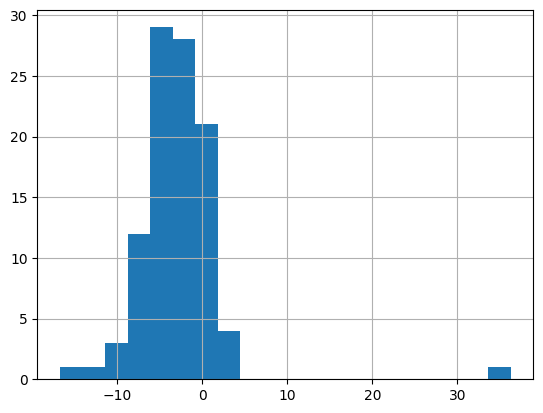

In [20]:
# Making Difference Column
republican_votes['diff'] = republican_votes['repub_percent_08'] - republican_votes['repub_percent_12']

# Getting sample statistic
x_bar_diff = republican_votes['diff'].mean()

# Find the standard deviation of the diff column
s_diff = republican_votes['diff'].std()

# Plot a histogram of diff with 20 bins
republican_votes['diff'].hist(bins = 20)
plt.show()

### Exercise 6 : Using ttest()

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

**$\ H_{o}$** : The proportion of democratic votes in 2012 and 2016 were the same.

**$\ H_{A}$**: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.

- Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".
- What's the correct decision from the t-test, assuming $\alpha$ = 0.01?

In [21]:
# Conduct a t-test on diff
test_results = pingouin.ttest(
    x = republican_votes['diff'],
    y = 0,
    alternative = "two-sided"
)
                              
# Print the test results
display(test_results)

p_value = test_results['p-val'][0]

alpha = 0.01

print("alpha-value : ",alpha)

print("p-value : ",p_value)

print("\n** Hypothesis Test Results **")

if (p_value<=alpha):
    print("Rejecting H~O~")
    print("\nThe proportion of democratic votes in 2012 and 2016 were different..")
else:
    print("\nNot Rejecting H~O~")
    print("\nThe proportion of democratic votes in 2012 and 2016 were the same..")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,two-sided,1.914507e-07,"[-3.9, -1.86]",0.560104,6.616e+04,0.999832


alpha-value :  0.01
p-value :  1.9145074570544958e-07

** Hypothesis Test Results **
Rejecting H~O~

The proportion of democratic votes in 2012 and 2016 were different..


# ANOVA

## anova-tests

## pairwise-tests

## Bonferoni Correction

![BonferoniCorrection](BonferoniCorrection.png)

- As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. 
- The more tests we run, the higher the chance that at least one of them will give a false positive significant result. 
    - With a significance level of point-two, if we run one test, the chance of a false positive result is point-two. 
    - With five groups and ten tests, the probability of at least one false positive is around point-seven. 
    - With twenty groups, it's almost guaranteed that we'll get at least one false positive.

- **Solution** : The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive, one common adjustment is the Bonferroni correction. 
- Compare **corrected** and **uncorrected** p-values
    -  Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.

## Case Study : StackOverflow Job Satisfaction Survey

- The Stack Overflow survey includes a job satisfaction variable, with five categories from "Very satisfied" down to "Very dissatisfied".
- Suppose we want to know if mean annual compensation is different for each of the levels of job satisfaction. 

**Methodology**

- Visualize the distributions of each satisfaction category with box plots.
    - Is the mean annual compensation different for different levels of job satisfaction?
```
sns.boxplot(x = 'converted_comp',
            y="job_sat",
            data = stack_overflow)
plt.show()
```
- Perform ANOVA test
    - ANOVA tests determine whether there are differences between the groups. 
    - We need to check if compensation is same across categories
    - $H_{0}$ : Compensation across different job satisfaction categories is same
    - $H_{A}$ : Compensation across different job satisfaction categories is different
```
# Chose deliberately high significance/alpha value
alpha = 0.2

# Perform anova test using pinguoin package
anova_test = pinguoin.anova(data = stack_overflow,
               dv = 'comverted_comp',
               between = 'job_sat')

# Get p-valu stored in p-unc column
p_value = anova_test['p-unc'][0]

if (p_value<= alpha):
    print("\nReject Null Hypothesis")
    print("\nAt least two categories have significantly different compensation")
else:
    print("Fail to Reject Null Hypothesis")
    print("\nAll categories have same compensation")
```
    - Although the test tells that atleast two categories are different, we need to identify which are

- Perform pairwise test (with correction)
    - There are $n\choose2$ ways to pick two elements from n available options, here there are $5\choose2$ = 10 ways tests to perform
    - Hence, we'd perform pairwise test
    - Bear in mind to correct p-values

```
# Perform pairwise test using pinguoin package
anova_test = pinguoin.pairwise(data = stack_overflow,
                            dv = 'comverted_comp',
                            between = 'job_sat',
                            padjust = "bonf" # default is 'none'
                            )
```

Visualizing distribution of salaries for each category

In [91]:
sns.boxplot(x = 'converted_comp',
            y="job_sat",
            data = stackoverflow)
plt.show()

NameError: name 'sns' is not defined

Performing ANOVA test

In [92]:
# Chose deliberately high significance/alpha value
alpha = 0.2

# Perform anova test using pinguoin package
anova_test = pingouin.anova(data = stackoverflow,
               dv = 'converted_comp',
               between = 'job_sat')

# Get p-valu stored in p-unc column
p_value = anova_test['p-unc'][0]

if (p_value<= alpha):
    print("\nReject Null Hypothesis")
    print("\nAt least two categories have significantly different compensation")
else:
    print("Fail to Reject Null Hypothesis")
    print("\nAll categories have same compensation")


Reject Null Hypothesis

At least two categories have significantly different compensation


Performing pairwise test

In [93]:
# Perform pairwise test using pinguoin package
pairwise_test = pingouin.pairwise_tests(data = stackoverflow,
                            dv = 'converted_comp',
                            between = 'job_sat',
                            padjust = "bonf" # default is 'none'
                            )

pairwise_test

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


Assesing **corrected** p-values for pairwise test

In [94]:
pairwise_test[pairwise_test['p-corr']<=alpha][['A','B']]
# Fail to reject Null Hypothesis in above pairs, i.e. compensation is different for above two categories

,A,B
0,Slightly satisfied,Very satisfied
6,Very satisfied,Slightly dissatisfied


### Exercise 7 : Visualizing many categories

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.

- Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.
- Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode.
- Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.

shipment_mode
Air      56.186327
Ocean     4.970000
Name: pack_price, dtype: float64
shipment_mode
Air      38.330411
Ocean     1.876753
Name: pack_price, dtype: float64


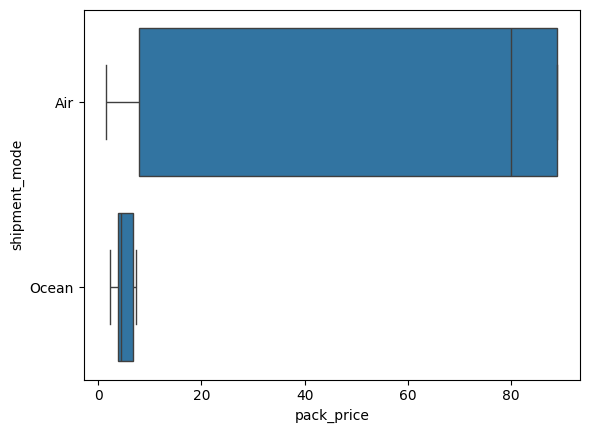

In [95]:
# Filtering data for late shipments
late_shipments = shipments[shipments['late']=='Yes']

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x = 'pack_price',
            y = 'shipment_mode',
            data = late_shipments)
plt.show()

### Exercise 8 : Conducting an ANOVA test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_{0}$: Pack prices for every category of shipment mode are the same.

$H_{A}$: Pack prices for some categories of shipment mode are different.

Use a significance level of 0.1.

late_shipments is available and pingouin has been loaded.

- Run an ANOVA on late_shipments investigating 'pack_price' (the dependent variable) between the groups of 'shipment_mode'.
- Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?

In [101]:
alpha = 0.1

# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=shipments,
                                dv = 'pack_price',
                                between = 'shipment_mode')

# Print anova_results
anova_results

p_value = anova_results['p-unc'][0]

if (p_value<=alpha):
    print("Reject Null Hyp.")
    print("\nPack prices for some categories of shipment mode are different.")
else:
    print("Fail to reject Null Hyp.")
    print("\nPack prices for some categories of shipment mode are same.")

Reject Null Hyp.

Pack prices for some categories of shipment mode are different.


### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

late_shipments is available and pingouin has been loaded.

- Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.
- Modify the pairwise t-tests to use the Bonferroni p-value adjustment.
- Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?

In [99]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data = shipments,
                                           dv = 'pack_price',
                                           between = 'shipment_mode',
                                           padjust = 'none') 

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,15.277,-0.423775


In [100]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.179625,600.685682,two-sided,8.748346e-75,2.624504e-74,bonf,5.809e+76,0.726592
1,shipment_mode,Air,Ocean,False,True,19.335760,986.979785,two-sided,6.934555e-71,2.080367e-70,bonf,1.129e+67,0.711119
2,shipment_mode,Air Charter,Ocean,False,True,-3.170654,35.615026,two-sided,3.123012e-03,9.369037e-03,bonf,15.277,-0.423775


**After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.**

# One-Sample Proportion test

- _p_ : Population proportion (unknown population parameter)
- $\hat{p}$ : sample proportion (sample statistic)
- $p_{o}$  : hypothesized population proportion

**z-score**

- $z = \frac{(\hat{p} - mean(\hat{p}))}{SE(\hat{p})} = \frac{(\hat{p} - p)}{SE(\hat{p})}$

Assuming $H_{o}$ is true, $p_{o} = p$

- $z = \frac{(\hat{p} - p_{o})}{SE(\hat{p})} $

**Standard Error**

- $ SE_{\hat{p}} =  \sqrt{\frac{p_{o}*(1-p_{o})}{n}}$

Under $H_{o}$ is true,  $ SE_{\hat{p}}$ depends on hypothesized $p_{o}$ and sample size $\ n$

- $z = \frac{(\hat{p} - p_{o})}{\sqrt{\frac{p_{o}*(1-p_{o})}{n}}} $

Here z- distribution just uses sample information $\hat{p}$ and $\ n$ and the hypothesized parameter $p_{o}$

### Why use z instead of t ?

- $t = \frac{(\bar{x}_{child} - \bar{x}_{adult})}{\sqrt{\frac{s^2_{child}}{n_{child}}+\frac{s^2_{adult}}{n_{adult}}}} $

- $s$ is calculated from $\bar{x}$
    - $\bar{x}$ estimates population mean
    - $s$ estimates population standard deviation
    - Uncertainity in our estimate of parameter gets increased

## Case Study : Stack Overflow Age Categories

**Hypothesis**

- **$\ H_{o}$** : Proportion of Stack Overflow users under thiry = 0.5
- **$\ H_{A}$** : Proportion of Stack Overflow users under thiry != 0.5

**Methodology**

- Choose significance value
    - $\alpha$ = 0.01
- Check sample proportions
    - `stack_overflow['age_cat'].value_counts(normalize = True)`
- Test Statistics
    - $p$ : Population proportion (unknown population parameter)
    - $\hat{p}$ : sample proportion (sample statistic)
    - $p_{o}$  : hypothesized population proportion

In [90]:
# Fixing significance level
alpha = 0.01

# Checking sample proportion
print(stack_overflow['age_cat'].value_counts(normalize = True))

# Calculating sample proportion
p_hat = stack_overflow[(stack_overflow['age_cat']=='Under 30')].shape[0]/stack_overflow.shape[0]

# Hypothesized Population parameter
p_0 = 0.50

# Checking sample size
n = len(stack_overflow)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator
print("z-score : ",z_score)

# Calculate the p-value from the z-score
p_value = (1 - norm.cdf(z_score))

print("alpha-value : ",alpha)

print("p-value : ",p_value)

print("\n** Hypothesis Test Results **")

if (p_value<=alpha):
    print("Rejecting H~O~")
    print("\nProportion of Stack Overflow users under thiry != 0.5.")
else:
    print("\nNot Rejecting H~O~")
    print("\nProportion of Stack Overflow users under thiry = 0.5.")

At least 30    0.559426
Under 30       0.440574
Name: age_cat, dtype: float64
z-score :  -2.6255366352330367
alpha-value :  0.01
p-value :  0.9956743750737111

** Hypothesis Test Results **

Not Rejecting H~O~

Proportion of Stack Overflow users under thiry = 0.5.


### Exercise 7 : Test for single proportions

In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

 
 $z = \dfrac{\hat{p} - p_{0}}{\sqrt{\dfrac{p_{0}*(1-p_{0})}{n}}}$

You'll revisit the p-value using this simpler calculation.

late_shipments is available. pandas and numpy are available under their usual aliases, and norm is loaded from scipy.stats.

- Hypothesize that the proportion of late shipments is 6%.
- Calculate the sample proportion of shipments where late equals "Yes".
- Calculate the number of observations in the sample.
- Calculate the numerator and denominator of the z-score.
- Calculate the z-score as the ratio of these numbers.
- Transform the z-score into a p-value, remembering that this is a "greater than" alternative hypothesis.



In [91]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = (1-norm.cdf(z_score))

# Print the p-value
print(p_value)

0.44703503936503364


While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

# Two-Sample Proportion test

- z score equation for a proportion test

$z = \frac{(\hat{p}_{>=30} - \hat{p}_{<30})}{SE(\hat{p}_{>=30} - \hat{p}_{<30})} $

- Standard error equation

$ SE(\hat{p}_{>=30} - \hat{p}_{<30}) = \sqrt{\dfrac{\hat{p}*(1-\hat{p})}{n_{>=30}}+\dfrac{\hat{p}*(1-\hat{p})}{n_{<30}}}$

- $\hat{p}$ --> weighted mean of ${p}_{<30}$ and ${p}_{>=30}$

$\hat{p} = \dfrac{\hat{p}_{>= 30} * {n}_{>= 30} + \hat{p}_{<30} * {n}_{<30}}{{n}_{<30}+{n}_{>= 30}}$

## Case Study : Stack Overflow comparing two proportions

- The Stack Overflow survey contains a **hobbyist** variable. The value "Yes" means the user described themselves as a hobbyist and "No" means they described themselves as a professional. 
- We can hypothesize that the proportion of hobbyist users is the same for the under thirty age category as the thirty or over category, which is a two-tailed test.

**Hypothesis**

- **$\ H_{o}$** : Proportion of hobbyist users is the same for those under 30 as those at least thiry
    - **$\ H_{o}$** : **$\ p_{>=30} - p_{<30} = 0$**


- **$\ H_{A}$** : Proportion of hobbyist users is different for those under 30 as those at least thiry
    - **$\ H_{A}$** : **$\ p_{>=30} - p_{<30}  != 0$**

In [23]:
stack_overflow = stackoverflow.copy()

p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)

n = stack_overflow.groupby("age_cat")['hobbyist'].count()

p_hat_at_least_30 = p_hats[("At least 30", "Yes")]

p_hat_under_30 = p_hats[("Under 30", "Yes")]

print(p_hat_at_least_30, p_hat_under_30)

n_at_least_30 = n["At least 30"]

n_under_30 = n["Under 30"]

print(n_at_least_30, n_under_30)

p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30)/(n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 + p_hat * (1-p_hat) / n_under_30)

z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error

print(z_score)

# p_value = norm.cdf(-z_score) + 1 - norm.cdf(z_score)
p_value = 2*(1-norm.cdf(z_score))

print(p_value)

if (p_value<=0.05):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject null hypothesis")

0.7733333333333333 0.8431048720066061
1050 1211
-4.223691463320559
1.9999759666985732
Fail to reject null hypothesis


In [ ]:
stack_overflow.groupby("age_cat")['hobbyist'].value_counts()

In [93]:
stack_overflow.groupby("age_cat")['hobbyist'].value_counts()

n_hobbyists = np.array([812, 1021])
n_rows = np.array([812 + 238, 1021 + 190])

z_score, p_value = proportions_ztest(count=n_hobbyists
                                     ,nobs=n_rows
                                     ,alternative="two-sided")
print(z_score, p_value)

-4.223691463320559 2.403330142685068e-05


### Exercise 8 : Test of two proportions

Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".

The hypotheses to test, with "late" corresponding to the proportion of late shipments for that group, are


$H_{O} = late_{\text{expensive}} -  late_{\text{reasonable}} = 0$

$H_{A} = late_{\text{expensive}} -  late_{\text{reasonable}} > 0$

p_hats contains the estimates of population proportions (sample proportions) for each freight_cost_group:

- Calculate the pooled sample proportion, , from p_hats and ns.

    $\hat{p} = \frac{n_{\text{expensive}} \times \hat{p}_{\text{expensive}} + n_{\text{reasonable}} \times \hat{p}_{\text{reasonable}}}{n_{\text{expensive}} + n_{\text{reasonable}}}$


- Calculate the standard error of the sample using this equation.

    $\text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}}) = \sqrt{\dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{expensive}}} + \dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{reasonable}}}}$

- Calculate p_hat multiplied by (1 - p_hat).
- Divide p_hat_times_not_p_hat by the number of "reasonable" rows and by the number of "expensive" rows, and sum those two values.
- Calculate std_error by taking the square root of p_hat_times_not_p_hat_over_ns
- Calculate the z-score using the following equation.

    $z = \frac{(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}{\text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}$

- Calculate the p-value from the z-score.

In [94]:
p_hats = shipments[['freight_cost_groups','late']].value_counts(normalize = True).tail(2)

ns = shipments[['freight_cost_groups']].value_counts()

print(p_hats)
print(ns)

freight_cost_groups  late
expensive            Yes     0.042596
reasonable           Yes     0.016227
dtype: float64
freight_cost_groups
expensive              531
reasonable             455
dtype: int64


In [95]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats['expensive'][0]*ns['expensive'] + p_hats['reasonable'][0]*ns['reasonable'])/(ns['expensive']+ns['reasonable'])
print(p_hat)

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats["expensive"] - p_hats["reasonable"]) / std_error
print(z_score)

# Calculate the p-value from the z-score
p_value = (1-norm.cdf(z_score))

# Print p_value
print(p_value[0])

0.030428020687186533
late
Yes    2.403168
dtype: float64
0.008126868706620716


### Exercise 9 : proportions_ztest() for two samples
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

Recall the hypotheses.

$H_{0}: late_{\text{expensive}} -  late_{\text{reasonable}} = 0$

$H_{A}: late_{\text{expensive}} -  late_{\text{reasonable}} > 0$

late_shipments is available, containing the freight_cost_group column. numpy and pandas have been loaded under their standard aliases, and proportions_ztest has been loaded from statsmodels.stats.proportion.

- Get the counts of the late column grouped by freight_cost_group.

In [96]:
# late_shipments = shipments[shipments['late']=='Yes']

# Count the late column values for each freight_cost_group
late_by_freight_cost_group = shipments.groupby("freight_cost_groups")['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


- Extract the number of "Yes"'s for the two freight_cost_group into a numpy array, specifying the 'expensive' count and then 'reasonable'.
- Determine the overall number of rows in each freight_cost_group as a numpy array, specifying the 'expensive' count and then 'reasonable'.
- Run a z-test using proportions_ztest(), specifying alternative as "larger".

In [97]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489+42, 439+16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,alternative="larger")


# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


# Chi-Square Test

- Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.
- **Statistical independence** : Two categorical variables are consider statistically independent when the proportion of successes in the response variable is the same across all categories of the explanatory variable.

## Case Study : Job Satisfaction and Age independence

- Stack Overflow sample has an age category variable with two categories and a job satisfaction variable with five categories.
- We can declare hypotheses to test for independence of these variables. 
- Taking age category is the response variable, and job satisfaction is the explanatory variable
    - $H_{O}$ : Age categories are independent of job satisfaction levels
    - $H_{A}$ : Age categories are not independent of job satisfaction levels

- The test statistic is denoted chi-square $\chi^2$. It quantifies how far away the observed results are from the expected values if independence was true.

**Methodology**

- Choose significance level (alpha $\alpha$ = 0.1)
- Exploring and visualizing data
```
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

```
- Performing chi-squared test
```
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)
```
- Here **Degree of Freedom** is calculated as follows
    - (#Response Categories - 1) x (#Explanatory vategories - 1)

- Performing chi-squared test by interchanging explanatory and response variable will again return same variable
```
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")
print(stats)
```

**Note** : 
Observed and expected counts squared must be non-negativechi-square tests are almost always right-tailed  Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because thedata was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though.

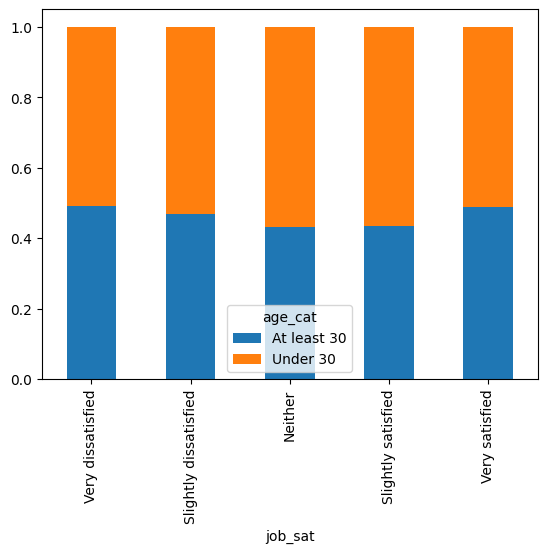

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


In [24]:
props = stackoverflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)
plt.show()


expected, observed, stats = pingouin.chi2_independence(data=stackoverflow, x="job_sat", y="age_cat")
stats

In [25]:
expected, observed, stats = pingouin.chi2_independence(data=stackoverflow, x="age_cat", y="job_sat")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,5.552373,4.0,0.235164,0.049555,0.437417
1,cressie-read,0.666667,5.554106,4.0,0.235014,0.049563,0.437545
2,log-likelihood,0.000000,5.558529,4.0,0.234632,0.049583,0.437871
3,freeman-tukey,-0.500000,5.562688,4.0,0.234274,0.049601,0.438178
4,mod-log-likelihood,-1.000000,5.567570,4.0,0.233854,0.049623,0.438538
5,neyman,-2.000000,5.579519,4.0,0.232828,0.049676,0.439419


### Exercise 10 : Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

- EXW: "Ex works". The buyer pays for transportation of the goods.
- CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
- DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
- FCA: "Free carrier". The seller pays for transportation of the goods.
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

- $H_{O}$ : vendor_inco_term and freight_cost_group are independent.

- $H_{A}$ : vendor_inco_term and freight_cost_group are associated.

late_shipments is available, and the following have been loaded: matplotlib.pyplot as plt, pandas as pd, and pingouin.

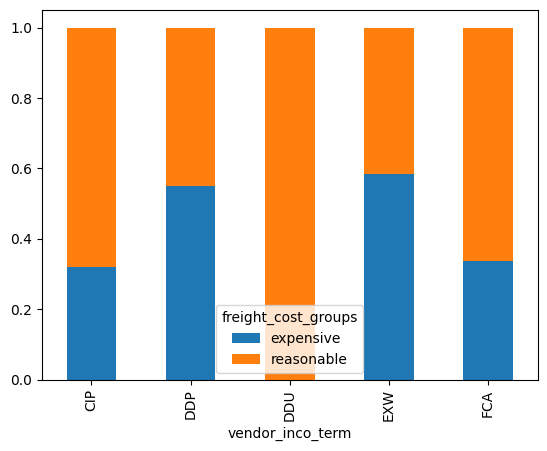

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235
Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.


In [29]:
alpha = 0.01

# Proportion of freight_cost_group grouped by vendor_inco_term
props = shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data = shipments, x = "vendor_inco_term", y = "freight_cost_groups")

# Print results
print(stats[stats['test'] == 'pearson'])

p_value = stats[stats['test'] == 'pearson']['pval'][0]

if (p_value<=alpha):
    print("Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.")
    
else:
    print("Fail to reject null Hypothesis and conclude that vendor_inco_term and freight_cost_group are independent")

# Assumptions of Hypothesis Testing

## 1. Randomness
**Assumption**
- The samples are random subsets of larger populations
**Consequence**
- Sample is not representative of the population
**Way to detect/identify?**
- Cannot be identified
- Needs to be checked from the data owner


## 2. Independence of observations
**Assumption**
- Each observation is independent. 
- There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur. 
**Consequence**
- Increases chances of false negative/ positive error
**Way to detect/identify?**
- Check data collection methodology
- Needs to be checked from the data owner

## 3. Large sample size
**Assumption**
- Sample is big enough to mitigate uncertainity, so that Central Limit Theorem applies

**Consequence**
- Smaller samples incur greater uncertainty, which may mean that the Central Limit Theorem does not apply and the sampling distribution might not be normally distributed. 
- Wider confidence intervals
- Increased chances of false negatives/positive error
**Way to detect/identify?**

**t-test**

|Test Name|Check    |
|---------|---------|
|One-sample| $n$>=30|
|Two-sample| $n_{1}$>=30, $n_{2}$>=30|
|Paired sample| #Rows in data >=30|
|ANOVA|$n_{i}$>=30, for all values of $i$|

**proportion-test**

|Test Name|Check    |
|---------|---------|
|One-sample| $n * \hat{p}$>=10 and $n * (1-\hat{p})$>=10|
|One-sample| $n_{1} * \hat{p_{1}}$>=10, $n_{2} * \hat{p_{2}}$>=10 and $n_{1} * (1-\hat{p_{1}})$>=10, $n_{2} * (1-\hat{p_{2}})$>=10|

- $n$ : sample size for group $i$
- $\hat{p}$ : proportion of successes in sample group

**chi-square test**
|Test Name|Check    |
|---------|---------|
|Chi-Square| $n_{i} * \hat{p_{i}}$>=5, $n_{i} * (1-\hat{p_{i}})$>=5|

- $n_{i}$ : sample size for group $i$
- $\hat{p_{i}}$ : proportion of successes in sample group $i$

## 4. Sanity Check
- If the bootstrap distribution doesn't look normal, assumptions likely aren't valid
- One more check we can perform is to calculate a bootstrap distribution and visualize it with a histogram. If we don't see a bell-shaped normal curve, then one of the assumptions hasn't been met. In that case, we should revisit the data collection process, and see if any of the three assumptions of randomness, independence, and sample size do not hold.

# Non-Parametric Test

## 1. Wilcoxon signed-rank Test (Paired t-Test)

- Wilcoxon sign rank test is used for testing the difference between two related variables which takes into account the magnitude and direction of difference, however, Sign test ignores the magnitude and only considers the direction of the difference.

- **Example** : 

| Student | 1 | 2 | 3 | 4 | 5 | 6 |
|---------|---|---|---|---|---|---|
| Before | 8 | 6 | 4 | 2 | 5 | 6 |
| After | 6 | 8 | 8 | 9 | 4 | 10 |

**Calculation Table**



### Case Study : Parametric v/s Non-parametric tests (Wilcoxon signed-rank Test)

**repub_votes_small** contains only five counties randomly sampled from the larger dataset of 2008 and 2012 county-level returns.

- Compare results of Parametric and Non-parametric tests

Link : https://www.analyticsvidhya.com/blog/2017/11/a-guide-to-conduct-analysis-using-non-parametric-tests/

In [98]:
republican_votes.head()

,state,county,repub_percent_08,repub_percent_12,diff
0,Alabama,Hale,38.957877,37.139882,1.817995
1,Arkansas,Nevada,56.726272,58.983452,-2.257179
2,California,Lake,38.896719,39.331367,-0.434648
3,California,Ventura,42.923190,45.250693,-2.327503
4,Colorado,Lincoln,74.522569,73.764757,0.757812


In [99]:
from random import sample
from scipy.stats import rankdata

# Get sample 
repub_votes_small = republican_votes.sample(5, random_state=42)

# Results with pingouin.test()
alpha = 0.01
ttest = pingouin.ttest(x = repub_votes_small['repub_percent_08'],
                       y = repub_votes_small['repub_percent_12'],
                       paired = True,
                       alternative = 'less')
display(ttest)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.338891,4,less,0.006132,"[-inf, -2.59]",0.954471,12.165,0.54747


In [100]:
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] - repub_votes_small['repub_percent_12']

repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()

repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])

repub_votes_small

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
83,Texas,Terrell,62.235067,64.504505,-2.269437,2.269437,1.0
53,New Mexico,Eddy,62.210720,65.301780,-3.091060,3.091060,2.0
70,South Dakota,Bon Homme,54.942234,59.531555,-4.589321,4.589321,3.0
45,Missouri,Montgomery,58.538251,65.515299,-6.977048,6.977048,4.0
44,Missouri,Iron,47.349343,55.867031,-8.517688,8.517688,5.0


In [108]:
T_minus = np.sum(repub_votes_small[repub_votes_small['diff']<0]['rank_abs_diff'].tolist())

T_plus = np.sum(repub_votes_small[repub_votes_small['diff']>=0]['rank_abs_diff'].tolist())

W = np.min([T_minus, T_plus])

print(W)

0.0


Implementation of Wilcoxon Signed Rank Test (**Using pingouin**)

In [102]:
# Results with pingouin.test()
alpha = 0.01
ttest = pingouin.wilcoxon(x = repub_votes_small['repub_percent_08'],
                          y = repub_votes_small['repub_percent_12'],
                          alternative = 'less')
ttest

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.8


Implementation of Wilcoxon Signed Rank Test (**Using scipy**)

In [103]:
import scipy.stats as stats
alpha = 0.01

ttest = stats.wilcoxon(repub_votes_small['repub_percent_08'],repub_votes_small['repub_percent_12'])

print(ttest)

WilcoxonResult(statistic=0.0, pvalue=0.0625)


## 2. Wilcoxon-Mann-Whitney Test

- Mann Whitney U test is used for testing the difference between two independent groups with ordinal or continuous dependent variable.

In [104]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]

age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',values='converted_comp')

alpha = 0.01

mwu_test = pingouin.mwu(x = age_vs_comp_wide['child'],
                        y = age_vs_comp_wide['adult'],
                        alternative = 'greater')

mwu_test

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


### Exercise : Wilcoxon-Mann-Whitney
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.

- Select weight_kilograms and late from late_shipments, assigning the name weight_vs_late.
- Convert weight_vs_late from long-to-wide format, setting columns to 'late'.
- Run a Wilcoxon-Mann-Whitney test for a difference in weight_kilograms when the shipment was late and on-time.

In [105]:
# Select the weight_kilograms and late columns
weight_vs_late = shipments[['weight_kilograms','late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x = weight_vs_late_wide['Yes'],
                        y = weight_vs_late_wide['No'],
                        alternative = 'two-sided')


# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

## 3. Kruskal-Wallis Test

- Kruskal-Wallis is ANOVA
- Kruskal-Wallis test compares the outcome among more than 2 independent groups by making use of the medians.

In [106]:
alpha = 0.01

kw_test = pingouin.kruskal(data = stack_overflow,
                          dv = 'converted_comp',
                          between = 'job_sat')

kw_test

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


### Exercise : Kruskal-Wallis
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups.

late_shipments is available, and the following packages have been loaded: pingouin and pandas as pd.
- Run a Kruskal-Wallis test on weight_kilograms between the different shipment modes in late_shipments.

In [107]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=shipments,dv='weight_kilograms',between='shipment_mode')

# Print the results
kw_test

,Source,ddof1,H,p-unc
Kruskal,shipment_mode,2,125.096618,6.848799e-28


#### When you have a confidence interval width equal to one minus the significance level, if the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

####  Performing an unpaired t-test when our data is paired increases the chances of false negative errors.